I will start the task of Smartwatch Data Analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\dell\Documents\EDA Dataset\dailyActivity_merged.csv")
print(data.head())

           Id ActivityDay  Calories  SedentaryMinutes  LightlyActiveMinutes  \
0  1503960366  12/04/2016      1985               728                   328   
1  1503960366  13/04/2016      1797               776                   217   
2  1503960366  14/04/2016      1776              1218                   181   
3  1503960366  15/04/2016      1745               726                   209   
4  1503960366  16/04/2016      1863               773                   221   

   FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                   13                 25                        0   
1                   19                 21                        0   
2                   11                 30                        0   
3                   34                 29                        0   
4                   10                 36                        0   

   LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  \
0                    6          

Checking if the dataset has null values:

In [2]:
print(data.isnull().sum())

Id                          0
ActivityDay                 0
Calories                    0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
StepTotal                   0
dtype: int64


The dataset does not have any null values.
Evaluating the information about columns in the dataset:

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        940 non-null    int64 
 1   ActivityDay               940 non-null    object
 2   Calories                  940 non-null    int64 
 3   SedentaryMinutes          940 non-null    int64 
 4   LightlyActiveMinutes      940 non-null    int64 
 5   FairlyActiveMinutes       940 non-null    int64 
 6   VeryActiveMinutes         940 non-null    int64 
 7   SedentaryActiveDistance   940 non-null    int64 
 8   LightActiveDistance       940 non-null    int64 
 9   ModeratelyActiveDistance  940 non-null    int64 
 10  VeryActiveDistance        940 non-null    int64 
 11  StepTotal                 940 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 88.2+ KB
None


Converting the date column to datetime column

In [4]:
# Changing datatype of ActivityDay
data["ActivityDay"] = pd.to_datetime(data["ActivityDay"],format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDay               940 non-null    datetime64[ns]
 2   Calories                  940 non-null    int64         
 3   SedentaryMinutes          940 non-null    int64         
 4   LightlyActiveMinutes      940 non-null    int64         
 5   FairlyActiveMinutes       940 non-null    int64         
 6   VeryActiveMinutes         940 non-null    int64         
 7   SedentaryActiveDistance   940 non-null    int64         
 8   LightActiveDistance       940 non-null    int64         
 9   ModeratelyActiveDistance  940 non-null    int64         
 10  VeryActiveDistance        940 non-null    int64         
 11  StepTotal                 940 non-null    int64         
dtypes: datetime64[ns](1), 

Combinig very active, fairly active, lightly active, and sedentary minutes in the dataset

In [5]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

851    1440
136    1315
213    1019
521     993
404    1346
Name: TotalMinutes, dtype: int64


In [6]:
print(data.describe())

                 Id     Calories  SedentaryMinutes  LightlyActiveMinutes  \
count  9.400000e+02   940.000000        940.000000            940.000000   
mean   4.855407e+09  2303.609574        991.210638            192.812766   
std    2.424805e+09   718.166862        301.267437            109.174700   
min    1.503960e+09     0.000000          0.000000              0.000000   
25%    2.320127e+09  1828.500000        729.750000            127.000000   
50%    4.445115e+09  2134.000000       1057.500000            199.000000   
75%    6.962181e+09  2793.250000       1229.500000            264.000000   
max    8.877689e+09  4900.000000       1440.000000            518.000000   

       FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
count           940.000000         940.000000                    940.0   
mean             13.564894          21.164894                      0.0   
std              19.987404          32.844803                      0.0   
min               0

The dataset has a “Calories” column; it contains the data about the number of calories burned in a day. Evaluating the relationship between calories burned and the total steps walked in a day:

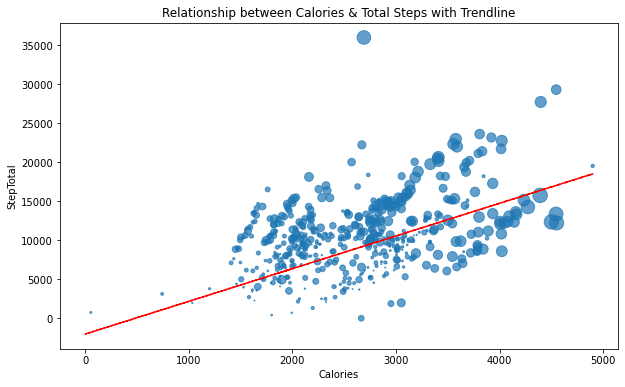

In [9]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(data["Calories"], data["StepTotal"], s=data["VeryActiveMinutes"], label="VeryActiveMinutes", alpha=0.7)

# Calculate the trendline
z = np.polyfit(data["Calories"], data["StepTotal"], 1)
p = np.poly1d(z)
plt.plot(data["Calories"], p(data["Calories"]), "r--", label="Trendline")

ax.set_title("Relationship between Calories & Total Steps with Trendline")
ax.set_xlabel("Calories")
ax.set_ylabel("StepTotal")
plt.show()


There is a linear relationship between the total number of steps and the number of calories burned in a day. Now checking the average total number of active minutes in a day:

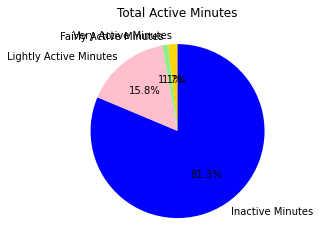

In [12]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold', 'lightgreen', 'pink', 'blue']

fig, ax = plt.subplots()
ax.pie(counts, labels=label, autopct='%1.1f%%', colors=colors, startangle=90)
ax.set_title('Total Active Minutes')
plt.show()


1. 81.3% of Total inactive minutes in a day


2. 15.8% of Lightly active minutes in a day


3. On an average, only 21 minutes (1.74%) were very active


4. and 1.11% (13 minutes) of fairly active minutes in a day

In [13]:
data["Day"] = data["ActivityDay"].dt.day_name()
print(data["Day"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


Now evaluating very active, fairly active, and lightly active minutes on each day of the week:

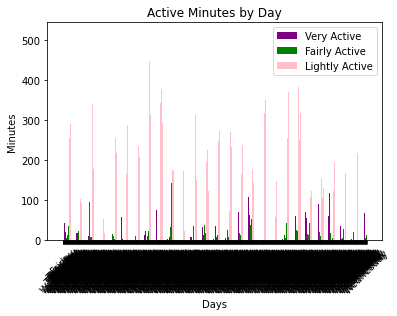

In [15]:
days = data["Day"]
very_active = data["VeryActiveMinutes"]
fairly_active = data["FairlyActiveMinutes"]
lightly_active = data["LightlyActiveMinutes"]

x = np.arange(len(days))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.bar(x - width, very_active, width, label='Very Active', color='purple')
rects2 = ax.bar(x, fairly_active, width, label='Fairly Active', color='green')
rects3 = ax.bar(x + width, lightly_active, width, label='Lightly Active', color='pink')

ax.set_xlabel('Days')
ax.set_ylabel('Minutes')
ax.set_title('Active Minutes by Day')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

plt.xticks(rotation=45)
plt.show()


Evaluating the number of inactive minutes on each day of the week

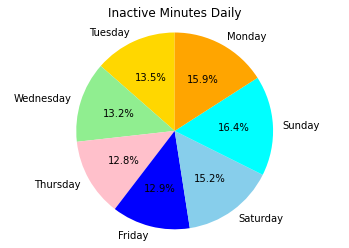

In [17]:
day_counts = data["Day"].value_counts()
label = day_counts.index
counts = data.groupby("Day")["SedentaryMinutes"].sum()

colors = ['gold', 'lightgreen', 'pink', 'blue', 'skyblue', 'cyan', 'orange']

fig, ax = plt.subplots()

ax.pie(counts, labels=label, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Inactive Minutes Daily')
plt.show()


Thursday is the most inactive day according to the lifestyle of all the individuals in the dataset. Now checking the number of calories burned on each day of the week:

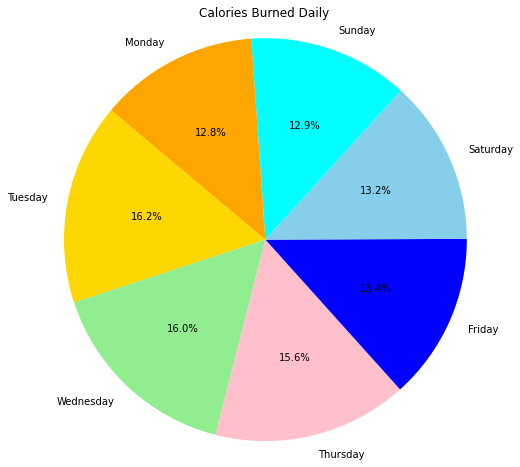

In [23]:

# Data
calories = data["Day"].value_counts()
label = calories.index
counts = calories

# Colors
colors = ['gold', 'lightgreen', 'pink', 'blue', 'skyblue', 'cyan', 'orange']

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Calories Burned Daily')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the chart
plt.show()


Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.